# Projeto de Classificação de Dígitos: dados MNIST
## Leonara Alves

Redes neurais estão cada vez mais poderosas para classificação de imagens. Nesse caso, é importante começar a entender como funciona o treinamento dessas redes e o porquê de obtermos resultados tão poderosos. Os dados utilizados para esse projeto foram o dados do MNIST - dados de dígitos escritos a mão - que é considerado um pontapé inicial para aqueles que querem se aventurar em deep learning. 

Os dados de treinamento contém 60,000 imagens de dígitos e os dados de teste têm 10,000 exemplos. 

![MNIST](images/mnist.png "MNIST")

> O objetivo desse projeto é obter a maior acurácia possível nos dados do MNIST.

Este notebook está dividido em 8 passos:

* [Passo 1](#passo1): Importação de pacotes e Leitura dos dados
* [Passo 2](#passo2): Visualização dos Dados
* [Passo 3](#passo3): Preparação dos Dados
* [Passo 4](#passo4): Construção do Modelo
* [Passo 5](#passo5): Treinamento do Modelo
* [Passo 6](#passo6): Avaliando o Modelo
* [Passo 7](#passo7): Fazendo Previsões
* [Passo 8](#passo8): Salvando o Modelo

## Importação de pacotes e Leitura dos dados

Nessa parte do nosso projeto, vamos fazer a importação de todos os pacotes que serão utilizados e a leitura do conjunto de dados do MNIST.

In [1]:
# Importação de pacotes
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mp_image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.models import model_from_json
import pandas as pd

Using TensorFlow backend.


Os dados foram extraídos do Kaggle: https://www.kaggle.com/oddrationale/mnist-in-csv em um formato mais padronizado: cada linha do arquivo .csv contém as informações de um dígito, sendo a primeira coluna a nossa variável 'target' e o restante é formado por colunas com os pixels.

In [2]:
# Path para a leitura das imagens
path_train = 'data/mnist_train.csv'
path_test = 'data/mnist_test.csv'

In [3]:
# Leitura dos dados de treinamento
dataset_train = pd.read_csv(path_train)

In [4]:
# Leitura dos dados de teste
dataset_test = pd.read_csv(path_test)

In [5]:
# Extraindo os dados
X_train = dataset_train.iloc[:,1:785].values
X_test = dataset_test.iloc[:,1:785].values

In [6]:
# Verificando o shape
X_train.shape

(60000, 784)

In [7]:
# Extraindo os labels dos dados de treinamento
y_train = dataset_train.loc[:,"label"].values

In [8]:
# Extraindo os labels dos dados de teste
y_test = dataset_test.loc[:,"label"].values

In [9]:
# Transformando os dados para o formato (samples, n_rows, n_cols)
X_train = X_train.reshape((X_train.shape[0],28,28))
X_test = X_test.reshape((X_test.shape[0],28,28))

In [10]:
# Print do Shape dos dados
print("Dados de Treinamento")
print("Shape X_train: {}".format(X_train.shape))
print("Shape y_train: {}".format(y_train.shape))
print()
print("Dados de Teste")
print("Shape X_test: {}".format(X_test.shape))
print("Shape y_test: {}".format(y_test.shape))

Dados de Treinamento
Shape X_train: (60000, 28, 28)
Shape y_train: (60000,)

Dados de Teste
Shape X_test: (10000, 28, 28)
Shape y_test: (10000,)


## Visualização dos Dados

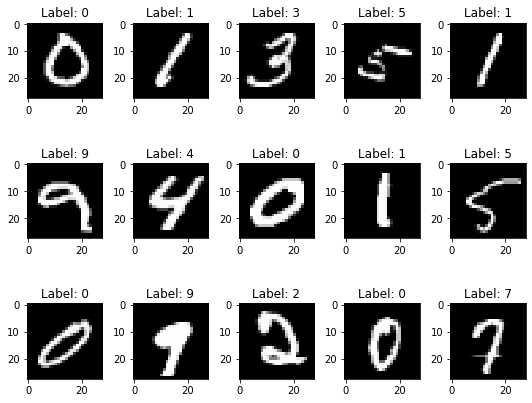

In [11]:
# Plotando algumas imagens do conjunto de dados
num_row = 3
num_col = 5
number = 15
indice = np.random.randint(0, X_train.shape[0], size = number)
fig, axes = plt.subplots(num_row, num_col, figsize = (1.5 * num_col, 2 * num_row))
for i in range(number):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[indice[i]], cmap = 'gray')
    ax.set_title('Label: {}'.format(y_train[indice[i]]))
plt.tight_layout()
plt.show()

In [12]:
# Criando uma função para visualizar a quantidade de classes nas bases
def count_classes(array):
    contagem = [np.count_nonzero(array == i) for i in range(0, 10)]
    return contagem

In [13]:
# Visualizando a quantidade de classes na base de treino
count_classes(y_train)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [14]:
# Visualizando a quantidade de classes na base de teste
count_classes(y_test)

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

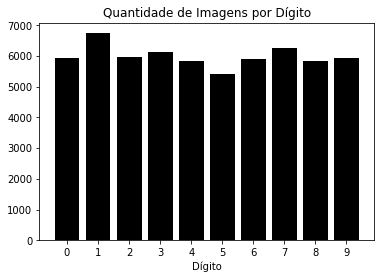

In [15]:
# Colocando essa informação em um gráfico de barras
plt.bar(range(0, 10), count_classes(y_train), align = 'center', color = 'black')
plt.xlabel('Dígito')
plt.xticks(range(0, 10))
plt.title('Quantidade de Imagens por Dígito')
plt.show()

## Preparação dos Dados

Para o treinamento nos dados do MNIST, precisamos fazer algumas transformações nos dados para prepará-los para o modelo.

In [16]:
# Conversão para float32 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [17]:
# Escala dos dados [0, 255] -> [0, 1]
X_train /= 255
X_test /= 255

In [18]:
# Separação dos dados de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 7, stratify = y_train)

In [19]:
# Visualizando a quantidade de classes na base de treino
count_classes(y_train)

[5331, 6068, 5362, 5518, 5258, 4879, 5326, 5638, 5266, 5354]

In [20]:
# Visualizando a quantidade de classes na base de validação
count_classes(y_val)

[592, 674, 596, 613, 584, 542, 592, 627, 585, 595]

In [21]:
# Definindo o numero de classes
num_classes = 10

In [22]:
# Converte vetores de classe para matrizes de classe binária
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

In [23]:
# Adicionando a profundidade = 1 (escala de cinza)
img_rows = img_cols = 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [24]:
# Print do reshape dos dados
print('X_train shape:', X_train.shape)
print("Exemplos dos dados de Treinamento: {}".format(X_train.shape[0]))
print("Exemplos dos dados de Validação: {}".format(X_val.shape[0]))
print("Exemplos dos dados de Teste: {}".format(X_test.shape[0]))
print("Input Shape: {}".format(input_shape))

X_train shape: (54000, 28, 28, 1)
Exemplos dos dados de Treinamento: 54000
Exemplos dos dados de Validação: 6000
Exemplos dos dados de Teste: 10000
Input Shape: (28, 28, 1)


## Construção do Modelo

Nessa etapa, vamos construir o nosso modelo:

- 2 Camadas Convolucionais com 32 filtros e tamanho do kernel igual a 3
- Normalização do Batch
- 1 Camada de Max Pooling com tamanho do pool igual a 2
- 1 Camada de Dropout com probabilidade de dropar o neurônio igual a 0.2
- 2 Camadas Convolucionais com 32 filtros e tamanho do kernel igual a 3
- Normalização do Batch
- 1 Camada de Max Pooling com tamanho do pool igual a 2
- 1 Camada de Dropout com probabilidade de dropar o neurônio igual a 0.2
- 1 Camada para transformar nossos resultados na forma vetorial
- 1 Camada densa com 500 neurônios
- 1 Camada de Dropout com probabilidade de dropar o neurônio igual a 0.5
- 1 Camada de saída com 10 neurônios (quantidade de dígitos)


In [25]:
# Modelo CNN
def create_model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = input_shape))
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size = 2))  
    model.add(Dropout(0.2))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = input_shape))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = 2))   
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))
    return model

In [26]:
# Instanciando o modelo
model = create_model()

In [27]:
# Sumário do modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)       

Observe que temos 1,638,886 parâmetros para serem aprendidos pelo nosso modelo.

In [28]:
# Compilação do modelo
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [29]:
# Aplicando um early stopping
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 5, verbose = 1, restore_best_weights = True)

## Treinamento do Modelo

Agora, vamos fazer o treinamento do modelo.

In [0]:
# Fit do modelo
modelo_treinado = model.fit(X_train, y_train, 
                            batch_size = 128, 
                            epochs = 50, 
                            verbose = 1, 
                            validation_data = (X_val, y_val), 
                            callbacks = [monitor])

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 13s 237us/step - loss: 0.2406 - accuracy: 0.9357 - val_loss: 0.1997 - val_accuracy: 0.9442
Epoch 2/50
54000/54000 [==============================] - 11s 199us/step - loss: 0.0790 - accuracy: 0.9771 - val_loss: 0.0640 - val_accuracy: 0.9822
Epoch 3/50
54000/54000 [==============================] - 11s 200us/step - loss: 0.0620 - accuracy: 0.9817 - val_loss: 0.0451 - val_accuracy: 0.9868
Epoch 4/50
54000/54000 [==============================] - 11s 201us/step - loss: 0.0531 - accuracy: 0.9852 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 5/50
54000/54000 [==============================] - 11s 199us/step - loss: 0.0439 - accuracy: 0.9874 - val_loss: 0.0293 - val_accuracy: 0.9913
Epoch 6/50
54000/54000 [==============================] - 11s 198us/step - loss: 0.0416 - accuracy: 0.9884 - val_loss: 0.0281 - val_accuracy: 0.9920
Epoch 7/50
54000/54000 [==============================] -

## Avaliando o Modelo

Para sabermos como o modelo se comportou nos dados de validação que utilizamos, vamos criar algumas visualizações.

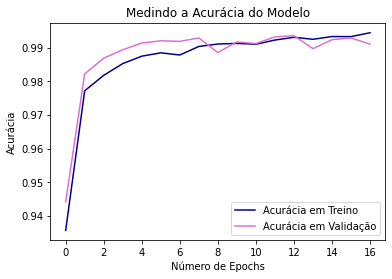

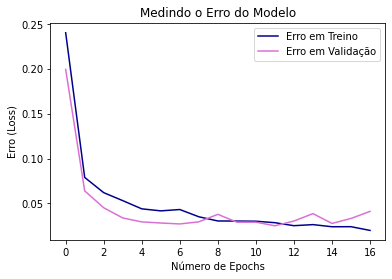

In [0]:
# Plot das métricas de acurácia e perda.
plt.figure(0)
plt.plot(modelo_treinado.history['accuracy'], label = 'Acurácia em Treino', color = "darkblue")
plt.plot(modelo_treinado.history['val_accuracy'], label = 'Acurácia em Validação', color = "orchid")
plt.title('Medindo a Acurácia do Modelo')
plt.xlabel('Número de Epochs')
plt.ylabel('Acurácia')
plt.legend()

plt.figure(1)
plt.plot(modelo_treinado.history['loss'], label = 'Erro em Treino', color = "darkblue")
plt.plot(modelo_treinado.history['val_loss'], label = 'Erro em Validação', color = "orchid")
plt.title('Medindo o Erro do Modelo')
plt.xlabel('Número de Epochs')
plt.ylabel('Erro (Loss)')
plt.legend()

# mostrando a figura
plt.show()

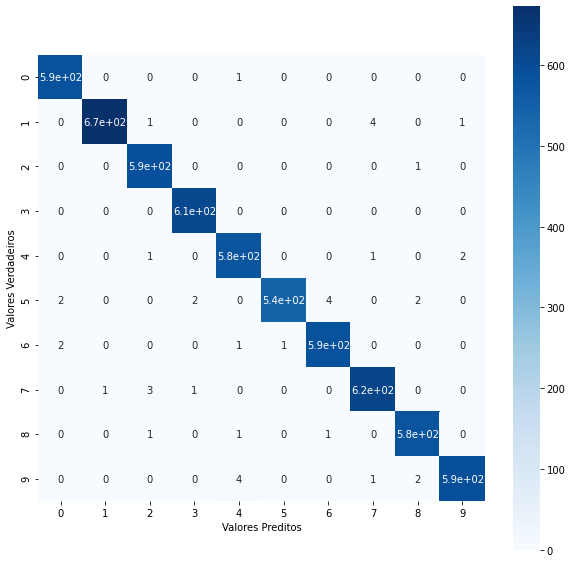

In [0]:
# Contruindo o plot da Matriz de confusão

# Definindo o tamanho do gráfico
fig = plt.figure(figsize=(10, 10)) 

# Predições nos dados de validação
y_pred_val = model.predict(X_val)
Y_pred_val = np.argmax(y_pred_val, 1) 
Y_validation = np.argmax(y_val, 1) 

# Construindo a matriz de confusão
matriz_confusao = confusion_matrix(Y_validation, Y_pred_val)

# Plotando a matriz de confusão
heatmap(matriz_confusao.T, square = True, annot = True, cbar = True, cmap = plt.cm.Blues)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Verdadeiros')
plt.show()

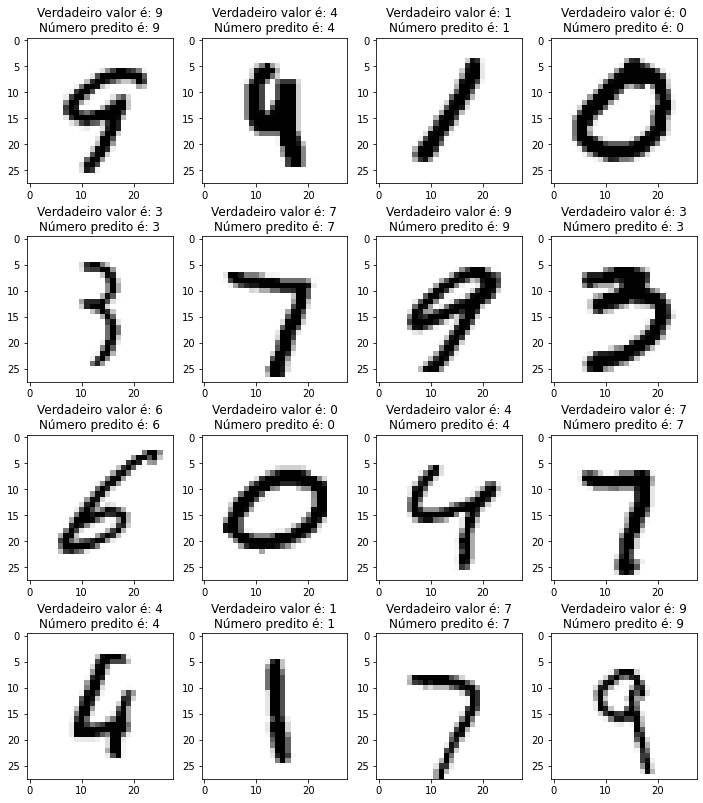

In [0]:
# Plotando alguns dos valores preditos
X_val_reshape = X_val.reshape(X_val.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_val_reshape[i], cmap = 'binary')
    ax.set(title = f"Verdadeiro valor é: {y_val[i].argmax()}\nNúmero predito é: {y_pred_val[i].argmax()}");

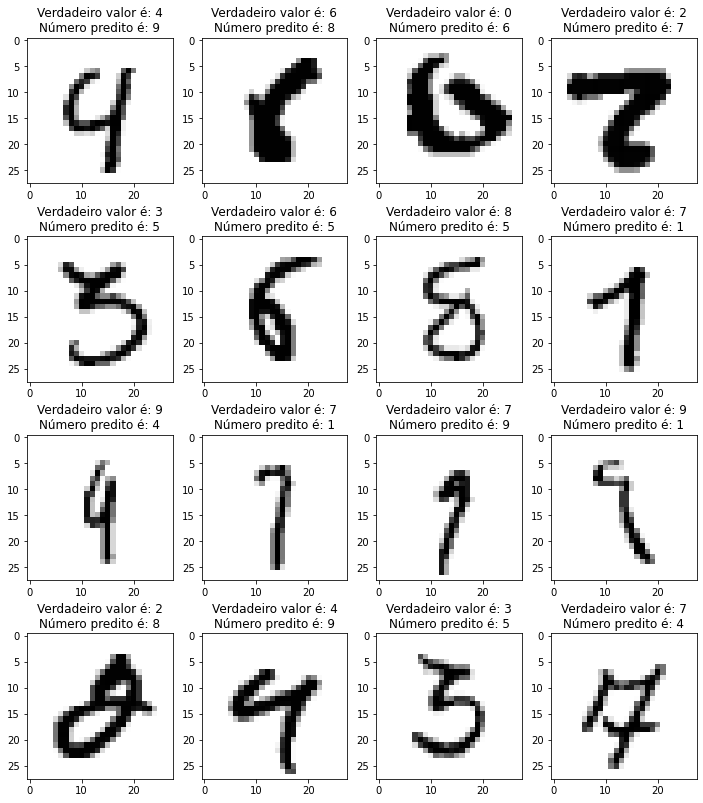

In [0]:
# Plotando os valores preditos errados
error = np.where(Y_pred_val != Y_validation)[0]

fig, axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_val_reshape[error[i]], cmap = 'binary')
    ax.set(title = f"Verdadeiro valor é: {y_val[error[i]].argmax()}\nNúmero predito é: {y_pred_val[error[i]].argmax()}");

Nota-se que houve apenas poucos erros cometidos pelo nosso modelo e ele foi capaz de obter uma acurácia maior que 90%.

## Fazendo Previsões

Agora que temos o modelo já treinado, vamos fazer as predições para os dados de teste e obter a acurácia final.

In [0]:
# Previsões nos dados de teste
score = model.evaluate(X_test, y_test, verbose = 0)
print("Acurácia: %.2f%%" % (score[1]*100), "| Erro (Loss): %.4f" % (score[0]))

Acurácia: 99.45% | Erro (Loss): 0.0203


Vamos avaliar como foi a performance do modelo nos dados de teste através da matriz de confusão.

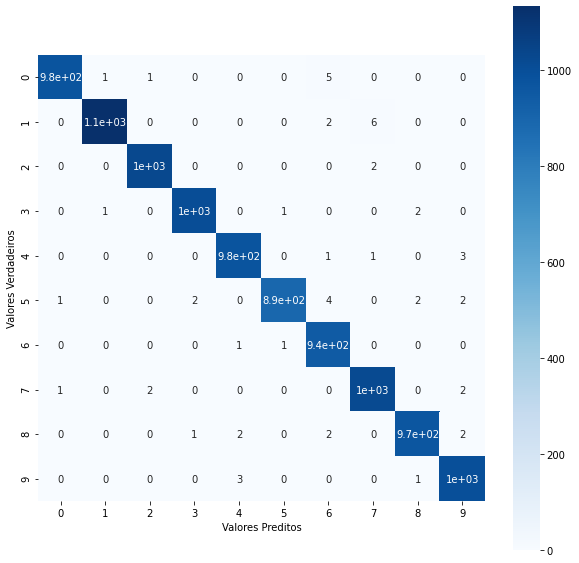

In [0]:
# Contruindo o plot da Matriz de confusão

# Definindo o tamanho do gráfico
fig = plt.figure(figsize =  (10, 10)) 

# Predições nos dados de validação
y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1) 
Y_test = np.argmax(y_test, 1) 

# Construindo a matriz de confusão
matriz_confusao = confusion_matrix(Y_test, Y_pred)

# Plotando a matriz de confusão
heatmap(matriz_confusao.T, square = True, annot = True, cbar = True, cmap = plt.cm.Blues)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Verdadeiros')
plt.show()

Note que houve somente alguns erros em torno da matriz. Vamos verificar quais foram esses dígitos.

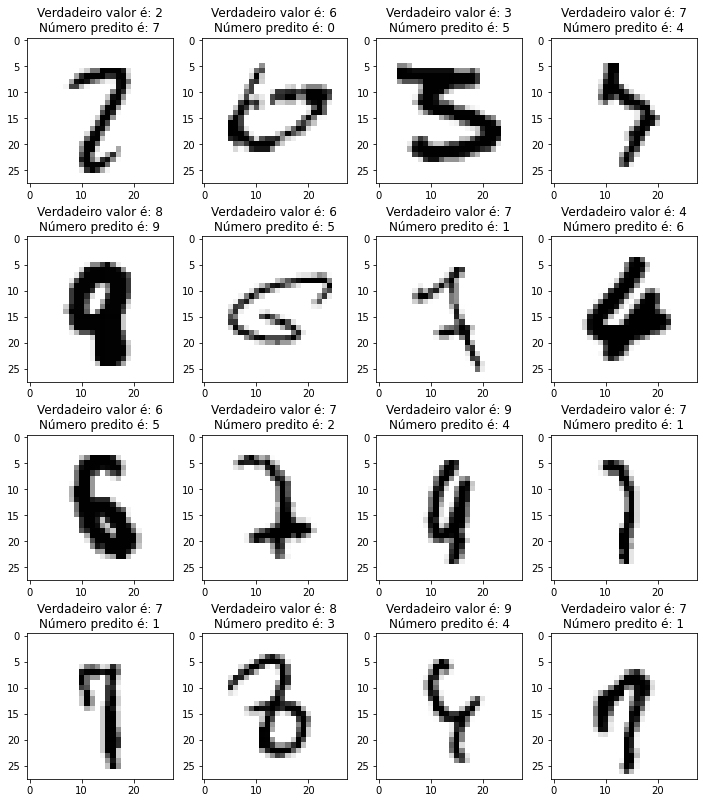

In [0]:
# Plotando os valores preditos errados
X_test_reshape = X_test.reshape(X_test.shape[0], 28, 28)
error = np.where(Y_pred != Y_test)[0]

fig, axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test_reshape[error[i]], cmap = 'binary')
    ax.set(title = f"Verdadeiro valor é: {y_test[error[i]].argmax()}\nNúmero predito é: {y_pred[error[i]].argmax()}");

Note que houve poucos erros nos dados de teste e alguns dígitos, de fato, são bem confusos.

## Salvando o Modelo

Nessa etapa, vamos salvar nosso modelo para uso posterior.

In [0]:
# Salvando os pesos do modelo no formato JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print('Modelo salvo com sucesso')

Modelo salvo com sucesso


In [0]:
# Lendo o modelo salvo
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print('Leitura realizada com sucesso')

Leitura realizada com sucesso
